Dados carregados com sucesso.
Colunas originais da pesquisa: ["('P1_l ', 'Nivel de Ensino')", "('P1_m ', 'Área de Formação')", "('P2_h ', 'Faixa salarial')", "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')", "('P2_g ', 'Nivel')", "('P4_d_1 ', 'SQL')", "('P4_d_2 ', 'R ')", "('P4_d_3 ', 'Python')", "('P4_d_4 ', 'C/C++/C#')", "('P4_d_5 ', '.NET')", "('P4_d_6 ', 'Java')", "('P4_d_7 ', 'Julia')", "('P4_d_8 ', 'SAS/Stata')", "('P4_d_9 ', 'Visual Basic/VBA')", "('P4_d_10 ', 'Scala')", "('P4_d_11 ', 'Matlab')", "('P4_d_12 ', 'Rust')", "('P4_d_13 ', 'PHP')", "('P4_d_14 ', 'JavaScript')", "('P4_d_15 ', 'Não utilizo nenhuma linguagem')", "('P1_b ', 'Genero')", "('P1_c ', 'Cor/raca/etnia')", "('P2_b ', 'Setor')", "('P1_i_1 ', 'uf onde mora')", "('P2_f ', 'Cargo Atual')", "('P4_e ', 'Entre as linguagens listadas abaixo, qual é a que você mais utiliza no trabalho?')", "('P2_o_1 ', 'Remuneração/Salário')", "('P2_o_2 ', 'Benefícios')", "('P2_o_3 ', 'Propósito do trabalho e da empr

<ipython-input-4-77a67c3c669a>:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=salary_col, data=df, order=order, palette='viridis')


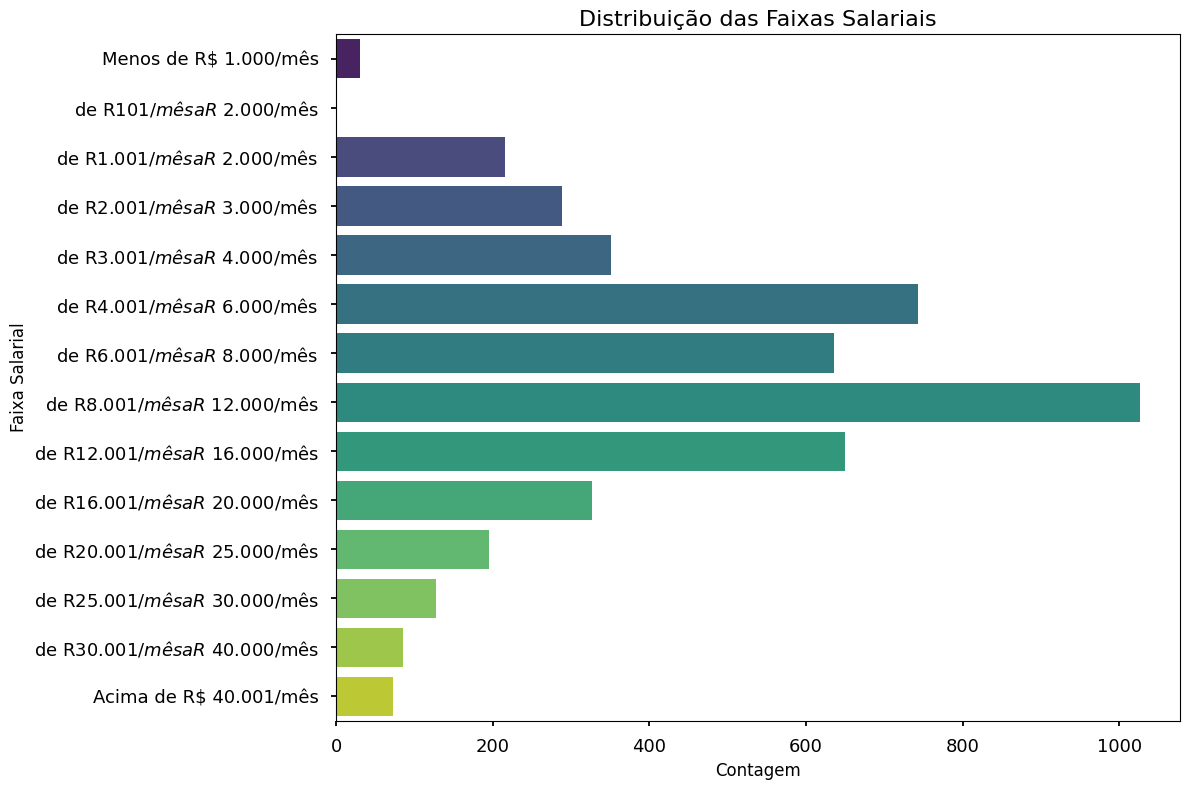

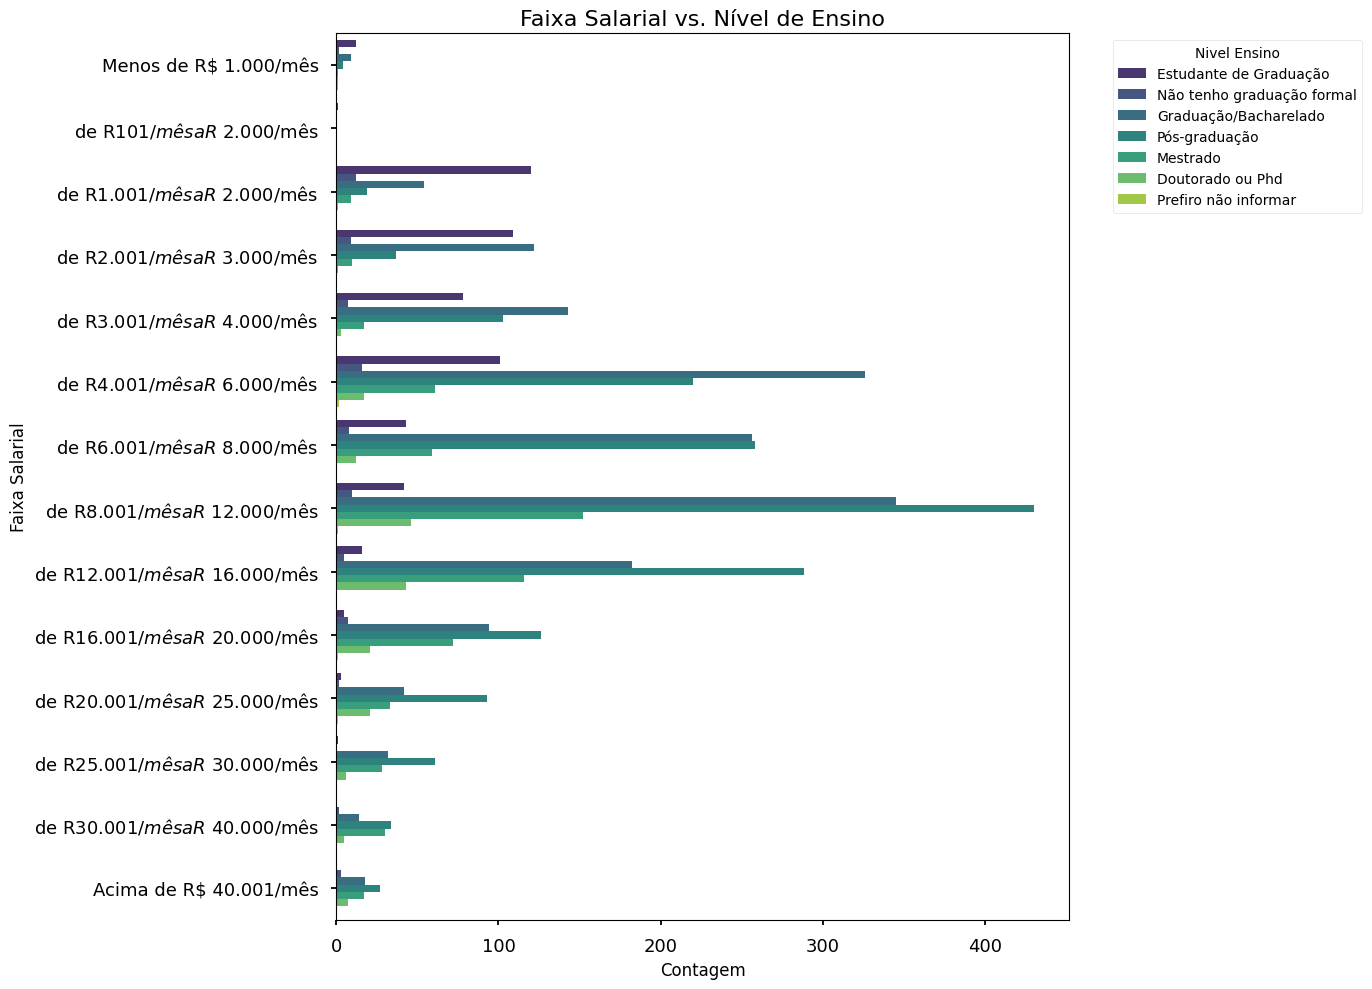

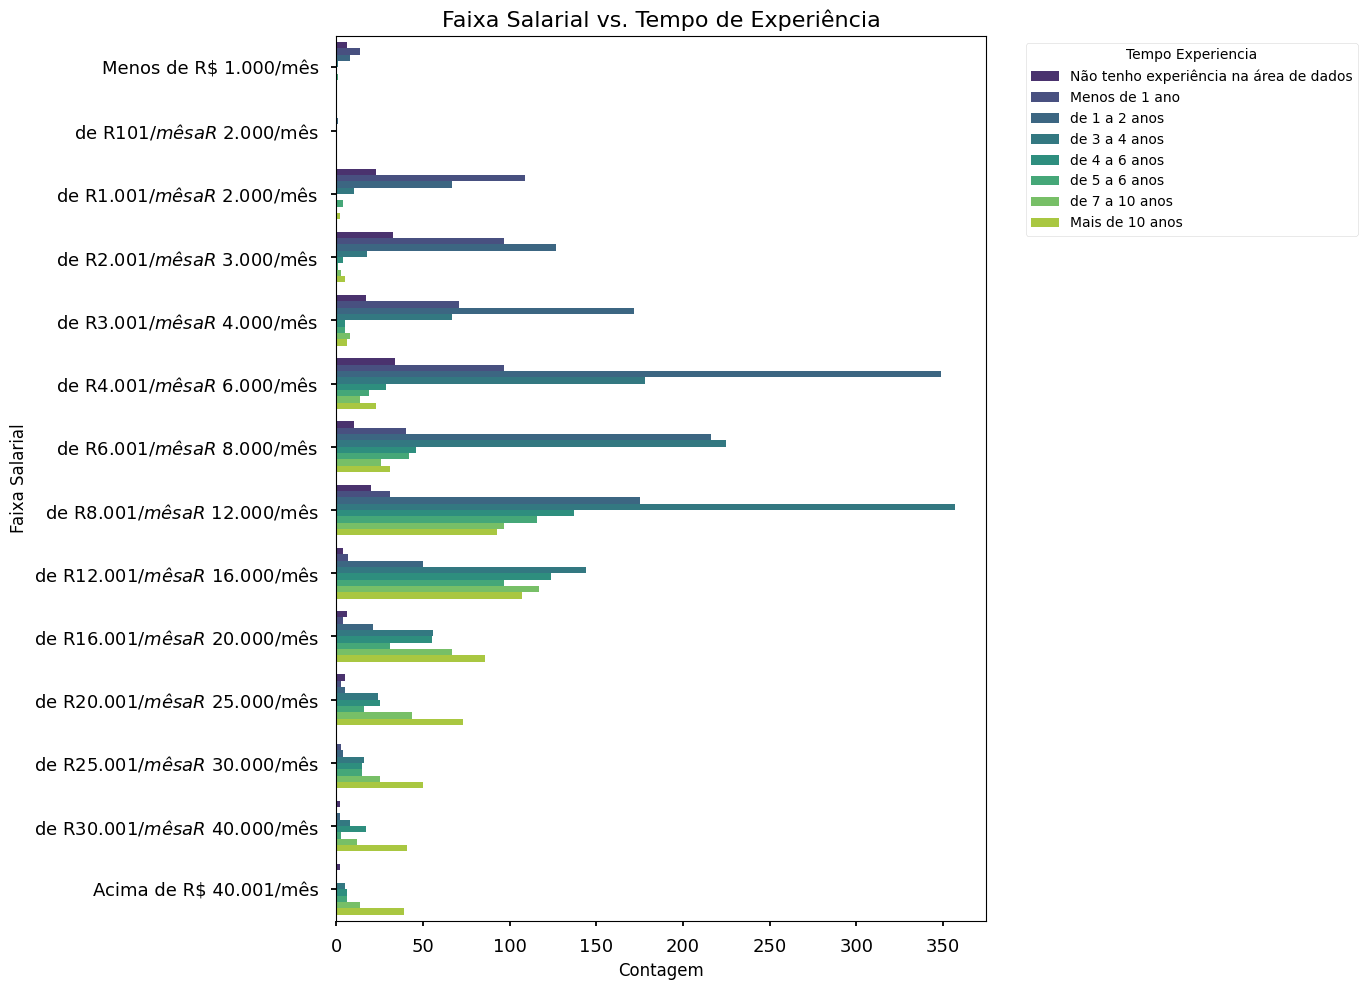

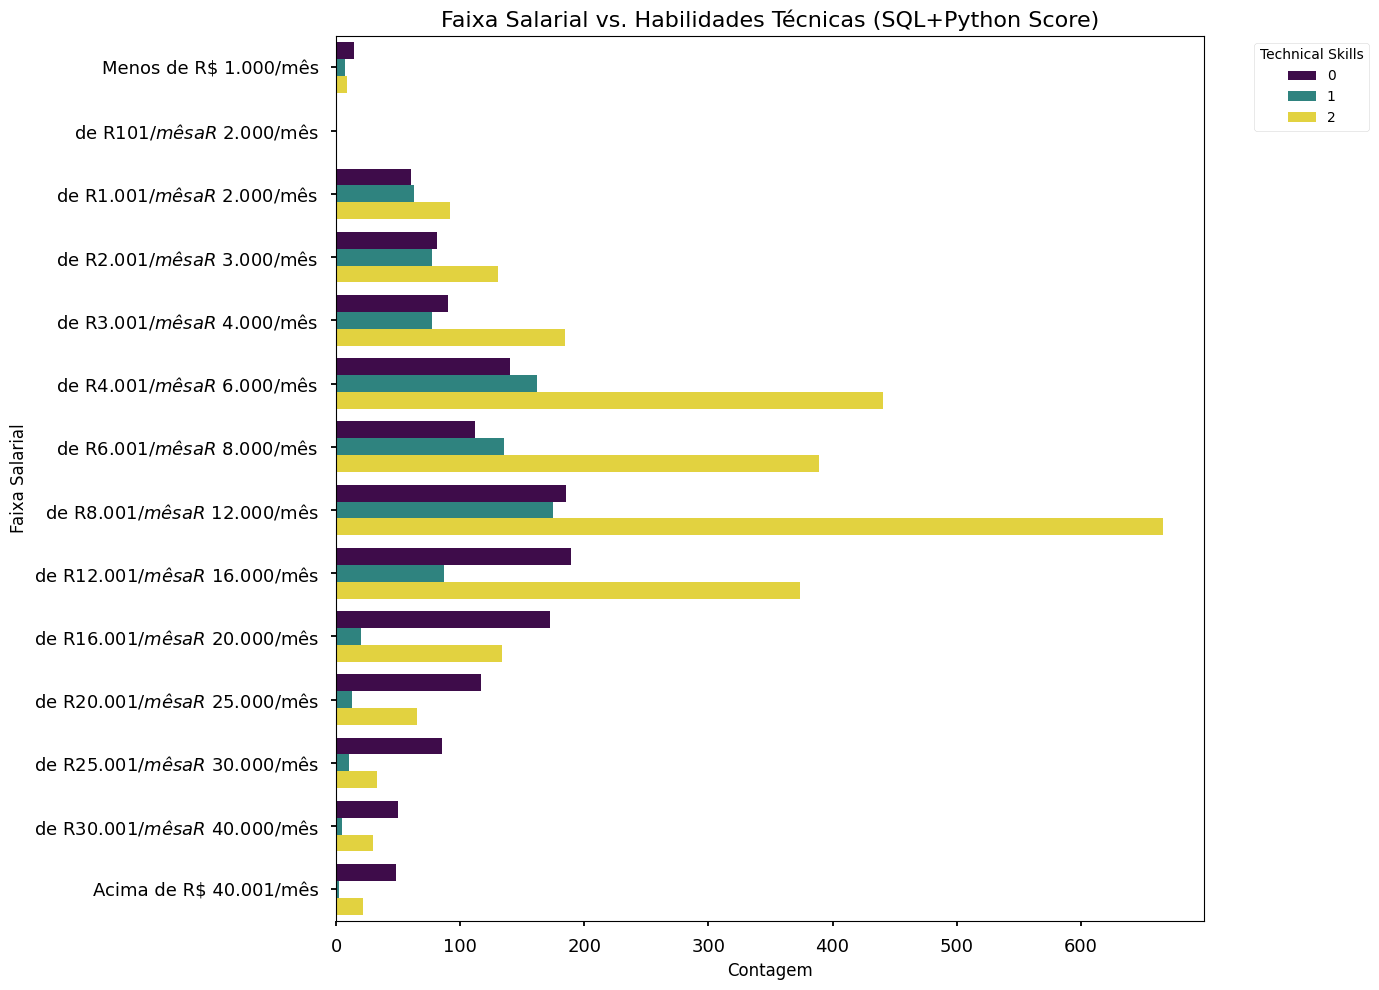

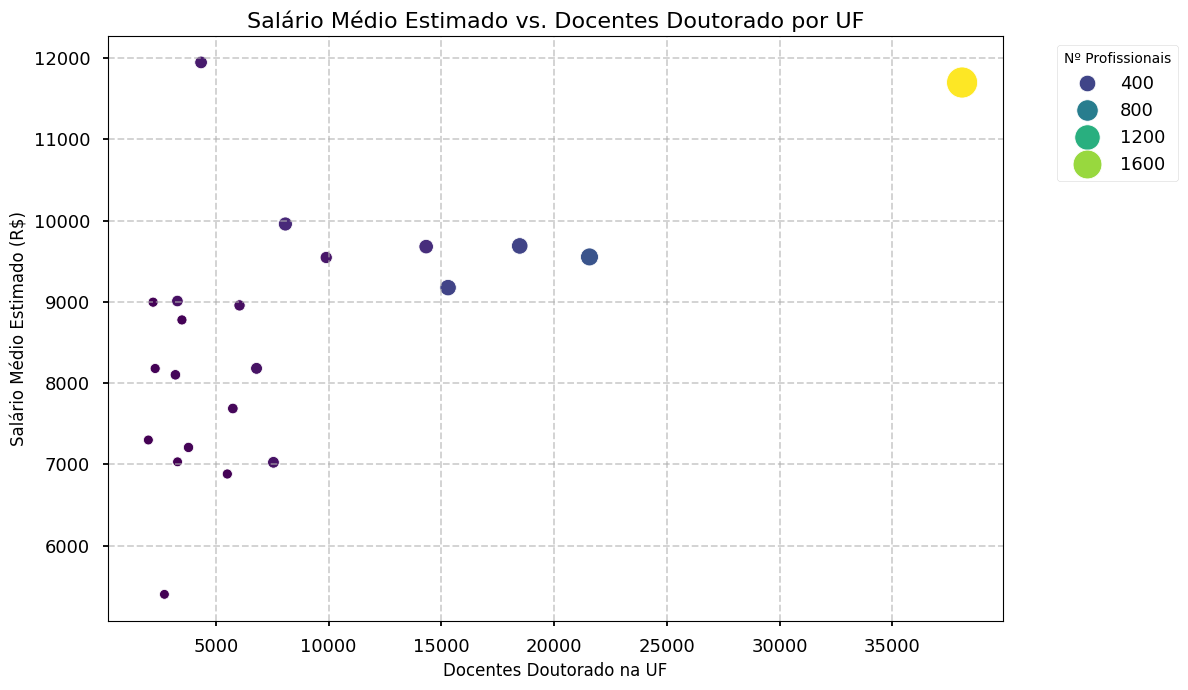

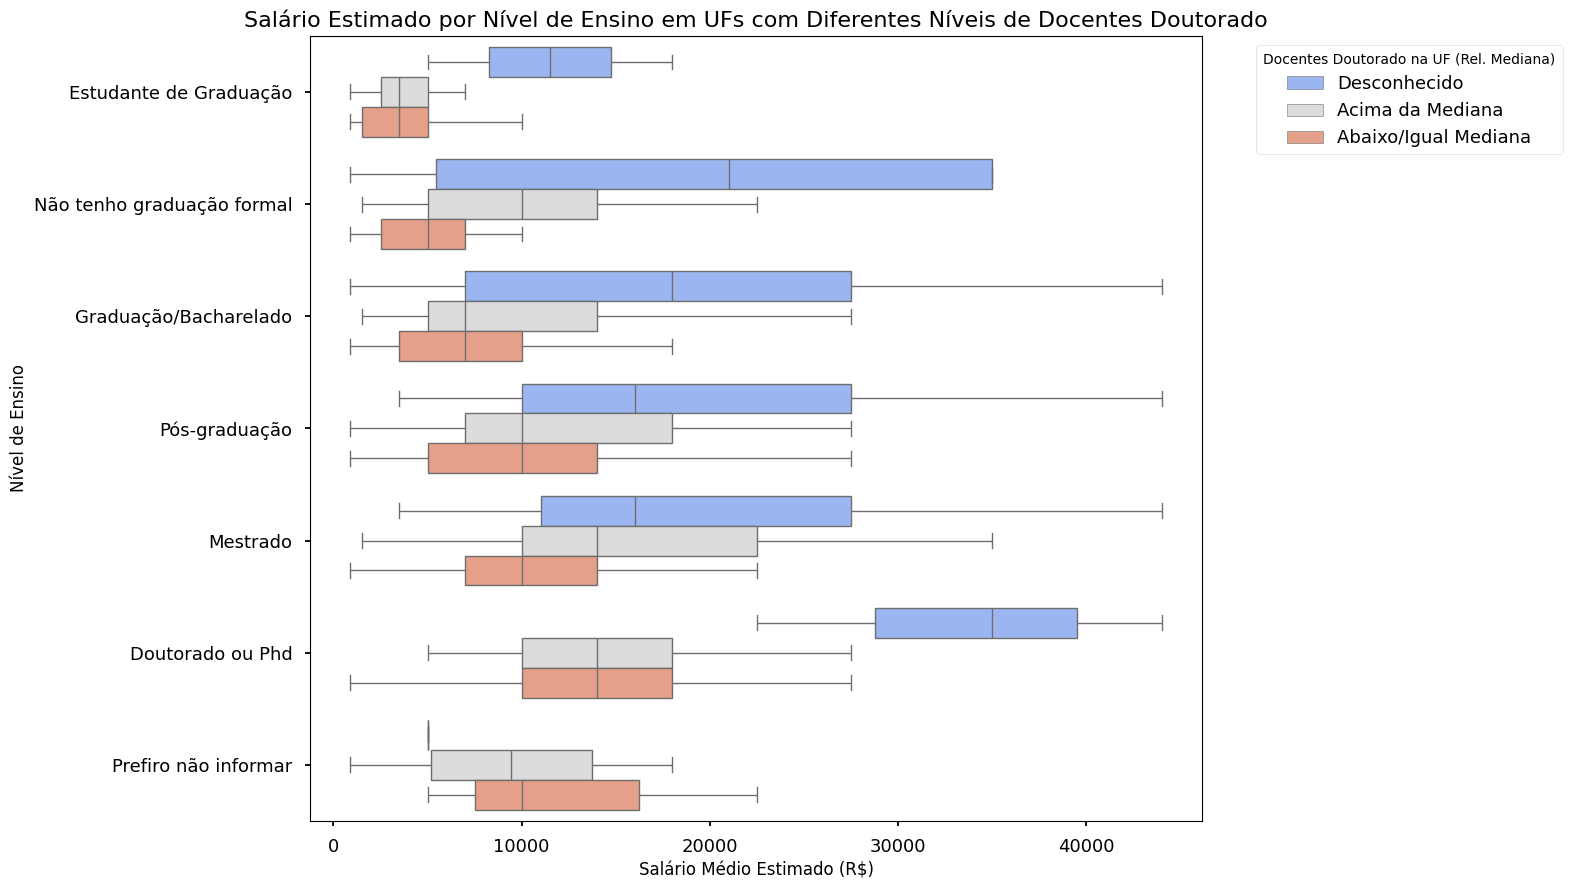


Análise exploratória concluída.

Cabeçalho final dos dados mergeados e processados:
             Nivel_Ensino                                      Area_Formacao  \
0        Doutorado ou Phd  Computação / Engenharia de Software / Sistemas...   
1   Graduação/Bacharelado  Computação / Engenharia de Software / Sistemas...   
2   Graduação/Bacharelado  Computação / Engenharia de Software / Sistemas...   
3        Doutorado ou Phd  Economia/ Administração / Contabilidade / Fina...   
4  Estudante de Graduação  Computação / Engenharia de Software / Sistemas...   

   SQL  Python Tempo_Experiencia Nivel_Senioridade  \
0    1       1     de 3 a 4 anos            Sênior   
1    1       1     de 3 a 4 anos             Pleno   
2    1       1     de 1 a 2 anos            Júnior   
3    1       1    Menos de 1 ano            Júnior   
4    1       1     de 1 a 2 anos             Pleno   

                     Faixa_Salarial  UF  Technical_Skills  Docentes_Mestrado  \
0  de R$ 12.001/mês a R$ 16.0

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # For NaN handling if needed

# --- Configuration ---
SURVEY_FILE = "survey_cleaned.csv"
UF_DATA_FILE = "microdados_agrupados_por_uf (1).csv"
MIN_PROFESSIONALS_PER_UF = 10 # Minimum number of respondents in a UF for UF-level analysis

# Define the mapping from EXACT original column names to desired clean names
# *** CRITICAL: Use the names exactly as shown in the file's header ***
COLS_MAP_ORIGINAL_TO_CLEAN = {
    "('P1_l ', 'Nivel de Ensino')": 'Nivel_Ensino',
    "('P1_m ', 'Área de Formação')": 'Area_Formacao',
    "('P4_d_1 ', 'SQL')": 'SQL',                 # Technical Skill 1
    "('P4_d_3 ', 'Python')": 'Python',           # Technical Skill 2
    "('P2_i ', 'Quanto tempo de experiência na área de dados você tem?')": 'Tempo_Experiencia',
    "('P2_g ', 'Nivel')": 'Nivel_Senioridade',   # Experience Level
    "('P2_h ', 'Faixa salarial')": 'Faixa_Salarial',     # Target variable
    "('P1_i_1 ', 'uf onde mora')": 'UF'          # <-- CORRECTED Column for State/UF
    # Add other original columns here if needed for future analysis
}

# Define the order for categorical plots (adjust as needed based on unique values in your data)
EDUCATION_ORDER = [
    'Estudante de Graduação', 'Não tenho graduação formal',
    'Graduação/Bacharelado', 'Pós-graduação', 'Mestrado', 'Doutorado ou Phd',
    'Prefiro não informar'
]
EXPERIENCE_ORDER = [
    'Não tenho experiência na área de dados', 'Menos de 1 ano', 'de 1 a 2 anos',
    'de 3 a 4 anos', 'de 4 a 6 anos', 'de 5 a 6 anos', # Verify these values exist
    'de 7 a 10 anos', 'Mais de 10 anos'
]


# --- Helper Functions ---

def load_data(survey_path, uf_path):
    """Loads the survey and UF data."""
    try:
        survey_df = pd.read_csv(survey_path, header=0)
        uf_df = pd.read_csv(uf_path, header=0)
        print("Dados carregados com sucesso.")
        print("Colunas originais da pesquisa:", survey_df.columns.tolist())
        print("\nCabeçalho dos dados da pesquisa:")
        print(survey_df.head())
        print("\nCabeçalho dos dados da UF:")
        print(uf_df.head())
        return survey_df, uf_df
    except FileNotFoundError as e:
        print(f"Erro: Arquivo não encontrado. Verifique os caminhos: {e}")
        raise
    except Exception as e:
        print(f"Erro ao carregar os dados: {e}")
        raise

def clean_and_prepare_survey_data(df, column_map):
    """Selects relevant columns, renames them, and cleans data types."""
    original_cols_needed = list(column_map.keys())

    # Check for missing columns
    cols_present_in_df = [col for col in original_cols_needed if col in df.columns]
    cols_missing = [col for col in original_cols_needed if col not in df.columns]

    if cols_missing:
        print(f"\nAVISO: As seguintes colunas mapeadas NÃO foram encontradas no arquivo de pesquisa: {cols_missing}")
        print("Continuando apenas com as colunas encontradas...")
        if not cols_present_in_df:
            raise ValueError("Nenhuma das colunas essenciais foi encontrada no arquivo de pesquisa.")
        # Adjust the map to only include present columns
        column_map = {k: v for k, v in column_map.items() if k in cols_present_in_df}

    # Select only the columns that are present and needed
    df_subset = df[cols_present_in_df].copy()

    # Rename columns to clean names
    df_subset.rename(columns=column_map, inplace=True)
    print("\nColunas após seleção e renomeação:")
    print(df_subset.columns.tolist())

    # --- Data Type Conversion and Basic Cleaning ---
    # Convert SQL/Python indicators to numeric (0 or 1), handling errors
    if 'SQL' in df_subset.columns:
        df_subset['SQL'] = pd.to_numeric(df_subset['SQL'], errors='coerce').fillna(0).astype(int)
    if 'Python' in df_subset.columns:
        df_subset['Python'] = pd.to_numeric(df_subset['Python'], errors='coerce').fillna(0).astype(int)

    # Create a simple technical skills score (adjust logic if needed)
    if 'SQL' in df_subset.columns and 'Python' in df_subset.columns:
        df_subset['Technical_Skills'] = df_subset['SQL'] + df_subset['Python']
    elif 'SQL' in df_subset.columns:
        df_subset['Technical_Skills'] = df_subset['SQL']
    elif 'Python' in df_subset.columns:
        df_subset['Technical_Skills'] = df_subset['Python']
    else:
         df_subset['Technical_Skills'] = 0

    # Ensure categorical columns are strings (can help with merging and plotting)
    for col in ['Nivel_Ensino', 'Area_Formacao', 'Tempo_Experiencia', 'Nivel_Senioridade', 'Faixa_Salarial', 'UF']:
        if col in df_subset.columns:
            df_subset[col] = df_subset[col].astype(str).fillna('Desconhecido') # Handle potential NaNs as strings

    print("\nCabeçalho dos dados da pesquisa após limpeza:")
    print(df_subset.head())
    return df_subset

def prepare_uf_data(df):
    """Selects relevant columns from UF data and checks UF column."""
    if 'UF' not in df.columns:
        raise ValueError("Coluna 'UF' não encontrada no arquivo de microdados.")
    # Select relevant educational context columns
    cols_to_keep = ['UF', 'Docentes_Mestrado', 'Docentes_Doutorado'] # Add more if needed
    missing_uf_cols = [col for col in cols_to_keep if col not in df.columns]
    if missing_uf_cols:
        print(f"Aviso: Colunas {missing_uf_cols} não encontradas nos dados da UF. Serão ignoradas.")
        cols_to_keep = [col for col in cols_to_keep if col in df.columns]

    return df[cols_to_keep].copy()

def merge_data(survey_df_clean, uf_df_clean):
    """Merges the cleaned survey data with the UF data."""
    if 'UF' not in survey_df_clean.columns:
        raise ValueError("Coluna 'UF' não está presente nos dados da pesquisa limpos. Verifique a etapa de limpeza.")
    if 'UF' not in uf_df_clean.columns:
         raise ValueError("Coluna 'UF' não está presente nos dados da UF limpos.")

    merged_df = pd.merge(survey_df_clean, uf_df_clean, on='UF', how='left')
    print("\nDados mergeados com sucesso.")
    print("Cabeçalho dos dados mergeados:")
    print(merged_df.head())
    # Check how many rows lost UF info after merge (optional)
    print(f"Número de linhas sem informação da UF após merge: {merged_df['Docentes_Doutorado'].isnull().sum()}")
    return merged_df

def convert_salary_range_to_average(salary_range):
    """Converts a salary range string to an approximate average value."""
    if not isinstance(salary_range, str): return None
    salary_range = salary_range.lower().replace('.', '').replace('r$', '').replace('/mês', '').strip()
    try:
        if 'acima de' in salary_range:
            value = int(salary_range.split('acima de')[-1].strip())
            return value * 1.1 # Estimate: 10% above lower bound
        elif 'menos de' in salary_range or 'até' in salary_range:
            value = int(salary_range.split(' ')[-1].strip())
            return value * 0.9 # Estimate: 90% of upper bound
        elif ' a ' in salary_range:
            parts = salary_range.split(' a ')
            low = int(parts[0].split(' ')[-1].strip())
            high = int(parts[1].strip())
            return (low + high) / 2
    except (ValueError, IndexError, TypeError) as e:
        # print(f"Aviso: Não foi possível converter faixa salarial '{salary_range}'. Erro: {e}")
        return None
    return None # Default case if no pattern matches


# --- Plotting Functions ---
plt.style.use('seaborn-v0_8-talk')

def plot_salary_distribution(df, salary_col='Faixa_Salarial'):
    """Plots the distribution of salary ranges."""
    plt.figure(figsize=(12, 8))
    # Attempt to sort salary order based on calculated average
    if 'Salario_Medio_Estimado' in df.columns:
         order = df.groupby(salary_col)['Salario_Medio_Estimado'].mean().sort_values().index
    else:
         order = df[salary_col].value_counts().index

    sns.countplot(y=salary_col, data=df, order=order, palette='viridis')
    plt.title('Distribuição das Faixas Salariais', fontsize=16)
    plt.xlabel("Contagem", fontsize=12)
    plt.ylabel("Faixa Salarial", fontsize=12)
    plt.tight_layout()
    plt.show()

def plot_salary_vs_feature(df, feature_col, feature_order=None, salary_col='Faixa_Salarial', title_suffix=""):
    """Plots salary distribution against a categorical feature."""
    plt.figure(figsize=(14, 10)) # Increased size for hue
    # Attempt to sort salary order based on calculated average
    if 'Salario_Medio_Estimado' in df.columns:
         salary_order = df.groupby(salary_col)['Salario_Medio_Estimado'].mean().sort_values().index
    else:
         salary_order = df[salary_col].value_counts().index

    # Filter feature_order to only include values present in the data
    if feature_order:
        feature_order = [f for f in feature_order if f in df[feature_col].unique()]

    sns.countplot(y=salary_col, hue=feature_col, data=df, order=salary_order, hue_order=feature_order, palette='viridis', dodge=True) # Use dodge
    plt.title(f'Faixa Salarial vs. {title_suffix if title_suffix else feature_col.replace("_", " ")}', fontsize=16)
    plt.xlabel("Contagem", fontsize=12)
    plt.ylabel("Faixa Salarial", fontsize=12)
    plt.legend(title=feature_col.replace("_", " "), bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_uf_analysis(df, uf_context_col='Docentes_Doutorado', min_professionals=10):
    """Performs and plots analysis relating salary to UF context."""
    if 'Salario_Medio_Estimado' not in df.columns:
        print("Coluna 'Salario_Medio_Estimado' necessária para análise UF não encontrada.")
        return
    if uf_context_col not in df.columns:
        print(f"Coluna de contexto UF '{uf_context_col}' não encontrada.")
        return
    if df[uf_context_col].isnull().all():
        print(f"Coluna de contexto UF '{uf_context_col}' não contém dados válidos.")
        return


    # 1. Scatter Plot: Average Salary vs. UF Context (e.g., PhD Faculty)
    uf_analysis = df.groupby('UF').agg(
        Salario_Medio=('Salario_Medio_Estimado', 'mean'),
        Context_Value=(uf_context_col, 'first'), # Get the context value for the UF
        Contagem_Profissionais=('UF', 'size')
    ).reset_index().dropna(subset=['Salario_Medio', 'Context_Value']) # Ensure both avg salary and context are valid

    uf_analysis_filtered = uf_analysis[uf_analysis['Contagem_Profissionais'] >= min_professionals]

    if not uf_analysis_filtered.empty:
        plt.figure(figsize=(12, 7))
        sns.scatterplot(data=uf_analysis_filtered, x='Context_Value', y='Salario_Medio',
                        size='Contagem_Profissionais', hue='Contagem_Profissionais',
                        palette='viridis', sizes=(50, 500), legend='brief')
        plt.title(f'Salário Médio Estimado vs. {uf_context_col.replace("_", " ")} por UF', fontsize=16)
        plt.xlabel(f'{uf_context_col.replace("_", " ")} na UF', fontsize=12)
        plt.ylabel('Salário Médio Estimado (R$)', fontsize=12)
        plt.legend(title='Nº Profissionais', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"Não há UFs suficientes com pelo menos {min_professionals} profissionais e dados de {uf_context_col} para gerar o scatter plot.")

    # 2. Box Plot: Salary by Education, comparing High vs. Low Context UFs
    if pd.api.types.is_numeric_dtype(df[uf_context_col]):
        median_context = df[uf_context_col].median()
        df['Contexto_Educacional_UF'] = df[uf_context_col].apply(
            lambda x: 'Acima da Mediana' if pd.notna(x) and x > median_context else \
                      'Abaixo/Igual Mediana' if pd.notna(x) else 'Desconhecido'
        )

        plt.figure(figsize=(16, 9))
        # Filter education_order to only include values present in the data
        valid_education_order = [edu for edu in EDUCATION_ORDER if edu in df['Nivel_Ensino'].unique()]

        sns.boxplot(data=df.sort_values('Salario_Medio_Estimado'), # Sort for potentially better visual flow
                    x='Salario_Medio_Estimado', y='Nivel_Ensino', hue='Contexto_Educacional_UF',
                    order=valid_education_order, palette='coolwarm', showfliers=False) # Hide outliers for clarity
        plt.title(f'Salário Estimado por Nível de Ensino em UFs com Diferentes Níveis de {uf_context_col.replace("_", " ")}', fontsize=16)
        plt.xlabel('Salário Médio Estimado (R$)', fontsize=12)
        plt.ylabel('Nível de Ensino', fontsize=12)
        plt.legend(title=f'{uf_context_col.replace("_", " ")} na UF (Rel. Mediana)', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
    else:
        print(f"Não foi possível gerar boxplot por contexto UF pois '{uf_context_col}' não é numérica.")


# --- Main Execution ---
if __name__ == "__main__":
    # 1. Load Data
    survey_df_raw, uf_df_raw = load_data(SURVEY_FILE, UF_DATA_FILE)

    # 2. Clean and Prepare Survey Data
    survey_df_clean = clean_and_prepare_survey_data(survey_df_raw, COLS_MAP_ORIGINAL_TO_CLEAN)

    # 3. Prepare UF Data
    uf_df_clean = prepare_uf_data(uf_df_raw)

    # 4. Merge Data
    merged_df = merge_data(survey_df_clean, uf_df_clean)

    # 5. Feature Engineering: Convert Salary Range to Numeric Average
    merged_df['Salario_Medio_Estimado'] = merged_df['Faixa_Salarial'].apply(convert_salary_range_to_average)
    print(f"\nLinhas antes de remover NaNs de Salario_Medio_Estimado: {len(merged_df)}")
    # Remove rows where salary couldn't be converted (optional, but needed for numeric plots)
    merged_df.dropna(subset=['Salario_Medio_Estimado'], inplace=True)
    print(f"Linhas após remover NaNs de Salario_Medio_Estimado: {len(merged_df)}")

    # 6. Exploratory Data Analysis and Visualization
    if not merged_df.empty:
        # Basic Distributions and Relationships (Individual Factors)
        plot_salary_distribution(merged_df)
        plot_salary_vs_feature(merged_df, 'Nivel_Ensino', feature_order=EDUCATION_ORDER, title_suffix="Nível de Ensino")
        plot_salary_vs_feature(merged_df, 'Tempo_Experiencia', feature_order=EXPERIENCE_ORDER, title_suffix="Tempo de Experiência")
        plot_salary_vs_feature(merged_df, 'Technical_Skills', title_suffix="Habilidades Técnicas (SQL+Python Score)")

        # Analysis Incorporating UF Context
        plot_uf_analysis(merged_df, uf_context_col='Docentes_Doutorado', min_professionals=MIN_PROFESSIONALS_PER_UF)
        # You could call plot_uf_analysis again with 'Docentes_Mestrado' if desired

        print("\nAnálise exploratória concluída.")
        print("\nCabeçalho final dos dados mergeados e processados:")
        print(merged_df.head())
    else:
        print("\nNão foi possível prosseguir com a análise pois o DataFrame mergeado está vazio após a limpeza.")

